In [22]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

In [8]:
# ambil data dari assets-miniproject
os.chdir('D:/remote/machine-learning/assets-miniproject')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
train.head()

,ID,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,250,321,111,3,3.5,4.0,8.83,1,0.77
1,434,316,111,4,4.0,5.0,8.54,0,0.71
2,20,303,102,3,3.5,3.0,8.50,0,0.62
3,323,314,107,2,2.5,4.0,8.27,0,0.72
4,333,308,106,3,3.5,2.5,8.21,1,0.75


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 400 non-null    int64  
 1   GRE                400 non-null    int64  
 2   TOEFL              400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [11]:
train.describe()

,ID,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,249.027500,316.727500,107.335000,3.112500,3.375000,3.480000,8.580750,0.555000,0.724175
std,140.580382,10.969232,6.091432,1.145917,0.987072,0.921533,0.601328,0.497588,0.140564
min,2.000000,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.340000
25%,132.500000,309.000000,103.000000,2.000000,2.500000,3.000000,8.137500,0.000000,0.637500
50%,246.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.565000,1.000000,0.730000
75%,368.250000,324.250000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [12]:
test.head()

,ID,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research
0,362,334,116,4,4.0,3.5,9.54,1
1,74,314,108,4,4.5,4.0,9.04,1
2,375,315,105,2,2.0,2.5,7.65,0
3,156,312,109,3,3.0,3.0,8.69,0
4,105,326,112,3,3.5,3.0,9.05,1


In [53]:
X = train.drop(columns='Chance_of_Admit')
y = train['Chance_of_Admit']

# split agar test mendapat 100 data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 8), (100, 8), (300,), (100,))

In [20]:
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp

In [16]:
rsp.linreg_params

{'algo__fit_intercept': [True, False]}

In [54]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['GRE', 'TOEFL', 'SOP', 'LOR', 'CGPA'] ),
    ('categoric', cat_pipe(), ['University_Rating', 'Research'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

model = RandomizedSearchCV(pipeline, rsp.linreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)


print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))


Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'algo__fit_intercept': True}
0.8120450348650762 0.7967460320002212 0.8468329181057522


c:\Users\Kresna\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [41]:
test['Chance_of_Admit']= model.predict(test)
test.head()

,ID,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,362,334,116,4,4.0,3.5,9.54,1,0.901138
1,74,314,108,4,4.5,4.0,9.04,1,0.793712
2,375,315,105,2,2.0,2.5,7.65,0,0.569727
3,156,312,109,3,3.0,3.0,8.69,0,0.695407
4,105,326,112,3,3.5,3.0,9.05,1,0.806719


In [55]:
# r2
r2_score(y_test, model.predict(test))

-1.1896256188165384

In [57]:
#import random forst
from sklearn.ensemble import RandomForestRegressor

pipeline2 = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42))
])

model2 = RandomizedSearchCV(pipeline2, rsp.rf_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model2.fit(X_train, y_train)

print(model2.best_params_)
print(model2.score(X_train, y_train), model2.best_score_, model2.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 21, 'algo__max_features': 0.4699333119864082, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 195}
0.8658065086254534 0.7839588213155809 0.8525342174145445


In [58]:
test2 = test.copy()

test2['Chance_of_Admit']= model2.predict(test2)
test2.head()

,ID,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,362,334,116,4,4.0,3.5,9.54,1,0.929183
1,74,314,108,4,4.5,4.0,9.04,1,0.772458
2,375,315,105,2,2.0,2.5,7.65,0,0.584857
3,156,312,109,3,3.0,3.0,8.69,0,0.703921
4,105,326,112,3,3.5,3.0,9.05,1,0.786641


In [64]:
# r2
r2_score(y_test, model2.predict(test2))

-1.0847796294048826

In [71]:
from jcopml.automl import AutoRegressor
#import xgboost

X_train = train.drop(columns='Chance_of_Admit')
y_train = train['Chance_of_Admit']

X_train.shape, y_train.shape

X_test = test.drop(columns='Chance_of_Admit')



# automl

model3 = AutoRegressor(['GRE', 'TOEFL', 'SOP', 'LOR', 'CGPA'], ['University_Rating', 'Research'])
model3.fit(X_train, y_train)



test3 = test.copy()

test3['Chance_of_Admit']= model3.predict(test3)


# r2
r2_score(y_test, model3.predict(test3))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.0002800940363375679
algo__fit_intercept       | True
algo__l1_ratio            | 0.42340148070636974

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=False, n_neighbors=5)
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 0.8214944478792111
Valid: 0.8122948808041416
Test : 0.81730192678573


-1.1902893808942316

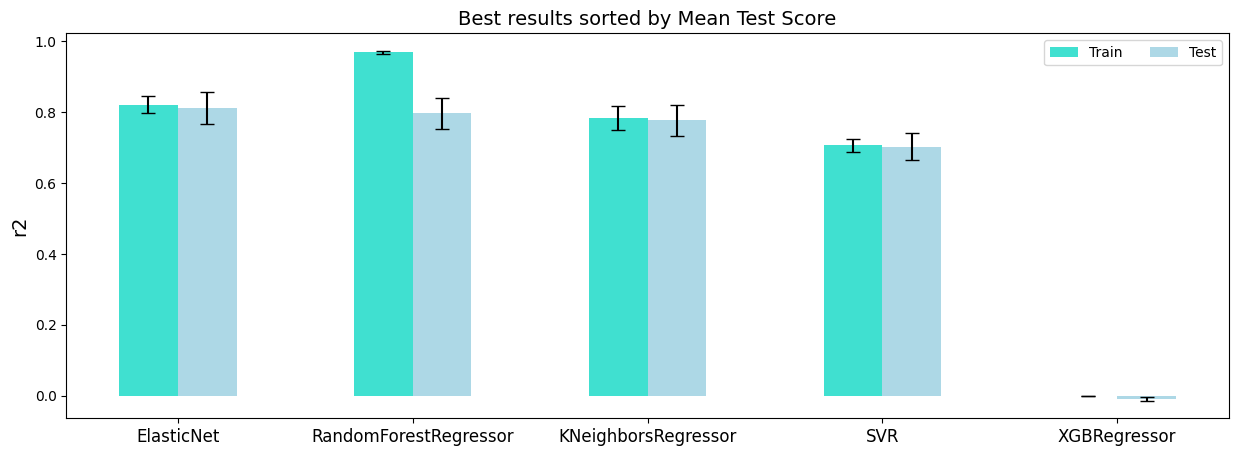

In [72]:

#plot automl

model3.plot_results()